# Финальный ноутбук проекта

### Описание данных

GA Sessions:
###### Одна строка = один визит на сайт.
- session_id — ID визита;
- client_id — ID посетителя;
- visit_date — дата визита;
- visit_time — время визита;
- visit_number — порядковый номер визита клиента;
- utm_source — канал привлечения;
- utm_medium — тип привлечения;
- utm_campaign — рекламная кампания;
- utm_keyword — ключевое слово;
- device_category — тип устройства;
- device_os — ОС устройства;
- device_brand — марка устройства;
- device_model — модель устройства;
- device_screen_resolution — разрешение экрана;
- device_browser — браузер;
- geo_country — страна;
- geo_city — город

GA Hits:
###### Одна строка = одно событие в рамках одного визита на сайтv
- session_id — ID визита;
- hit_date — дата события;
- hit_time — время события;
- hit_number — порядковый номер события в рамках сессии;
- hit_type — тип события;
- hit_referer — источник события;
- hit_page_path — страница события;
- event_category — тип действия;
- event_action — действие;
- event_label — тег действия;
- event_value — значение результата действия

### Импорт сторонних библиотек

In [1]:
import re
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

### Загрузка данных

In [2]:
com_df = pd.read_csv('data/new_df.csv')

In [3]:
com_df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target_action
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,2.108385e+08,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2.108386e+09,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2.108386e+09,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0


In [4]:
com_df.shape

(1781974, 19)

### Data Preparation

##### 1. Список колонок датасета

In [5]:
com_df.columns

Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_model', 'device_screen_resolution', 'device_browser',
       'geo_country', 'geo_city', 'target_action'],
      dtype='object')

##### 2. Описательные статистики датасета

In [6]:
com_df.describe(include=[object])

,session_id,visit_date,visit_time,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
count,1781974,1781974,1781974,1781893,1781974,1579596,1469230,727076,1781974,734010,1423571,15402,1781974,1781974,1781974,1781974
unique,1732266,226,85032,280,55,406,280,1192,3,13,200,104,4947,55,159,2389
top,1906362532065501532.1625350494.1625350494,2021-05-24,13:00:00,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Apple,AuMdmADEIoPXiWpTsBEj,414x896,Chrome,Russia,Moscow
freq,2,41746,60306,568527,540289,441701,968986,477062,1406765,434929,517859,9226,159495,978405,1730983,774214


In [7]:
com_df.describe(exclude=[object])

,client_id,visit_number,target_action
count,1.781974e+06,1.781974e+06,1.781974e+06
mean,1.074618e+09,2.676033e+00,2.823498e-02
std,6.201745e+08,1.223985e+01,1.656435e-01
min,2.321640e+02,1.000000e+00,0.000000e+00
25%,5.378789e+08,1.000000e+00,0.000000e+00
50%,1.074768e+09,1.000000e+00,0.000000e+00
75%,1.612408e+09,2.000000e+00,0.000000e+00
max,2.147483e+09,5.640000e+02,1.000000e+00


In [8]:
com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781974 entries, 0 to 1781973
Data columns (total 19 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   session_id                object 
 1   client_id                 float64
 2   visit_date                object 
 3   visit_time                object 
 4   visit_number              int64  
 5   utm_source                object 
 6   utm_medium                object 
 7   utm_campaign              object 
 8   utm_adcontent             object 
 9   utm_keyword               object 
 10  device_category           object 
 11  device_os                 object 
 12  device_brand              object 
 13  device_model              object 
 14  device_screen_resolution  object 
 15  device_browser            object 
 16  geo_country               object 
 17  geo_city                  object 
 18  target_action             int64  
dtypes: float64(1), int64(2), object(16)
memory usage: 258.3+ MB


Проверка на дубликаты

In [9]:
com_df[com_df.duplicated()]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target_action




Список всех признаков с пропущенными значениями:

In [10]:
missing_values = ((com_df.isna().sum() / len(com_df)) * 100).sort_values(ascending=False)
print([column for column in missing_values[missing_values != 0].keys()])

['device_model', 'utm_keyword', 'device_os', 'device_brand', 'utm_adcontent', 'utm_campaign', 'utm_source']


Пропуски в device_model

In [11]:
print(f"Количество пропущенных значений: {com_df.device_model.isna().sum()}")
com_df[com_df['device_model'].isna()].head()

Количество пропущенных значений: 1766572


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target_action
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,2.108385e+08,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2.108386e+09,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2.108386e+09,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0


In [12]:
com_df['device_model'].value_counts(dropna=False)

device_model
NaN                     1766572
AuMdmADEIoPXiWpTsBEj       9226
tWBQlsvNfHxRUjaPAfhd        614
cwMJxNXiWUgMUxGiCTPs        596
pTgAEPipQxDXCjPrJbHo        435
                         ...   
OJiWyBKOyDITzXCZRSMH          1
MBGYWAQSYWUphNxTsAWD          1
XnjPzKjkHmznVfULanbE          1
VDidzTqFGxuqiRQJGrwB          1
qmRODeCJLlmkmwxNYXvp          1
Name: count, Length: 105, dtype: int64

In [13]:
com_df[
    (com_df['device_model'].notna()) & (com_df['device_brand'].notna())
    ]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target_action
60,9055656589238457290.1635504877.1635504877,2.108434e+09,2021-10-29,13:54:37,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Meizu,qBRdfuuhOnnqwSqNiPOv,360x744,Chrome,Russia,Moscow,0
63,905565998839028208.1635310063.1635310063,2.108435e+08,2021-10-27,07:47:43,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,OnePlus,AshpvdJdReafUzEMmWGr,384x832,Android Webview,Russia,Saint Petersburg,0
64,905565998839028208.1636951969.1636951969,2.108435e+08,2021-11-15,07:52:49,2,ISrKoXQCxqqYvAZICvjs,smm,NaN,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,OnePlus,AshpvdJdReafUzEMmWGr,384x832,Android Webview,Russia,Saint Petersburg,0
164,9056202067269505745.1640092368.1640092368,2.108561e+09,2021-12-21,16:12:48,1,ZpYIoDJMcFzVoPFsHGJL,push,sbJRYgVfvcnqKJNDDYIr,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,(not set),AuMdmADEIoPXiWpTsBEj,384x854,Chrome,Russia,Moscow,0
206,9056422519349747445.1638964982.1638964982,2.108613e+09,2021-12-08,15:03:02,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,RrhnkuoaqckNtJpAZDzH,mobile,Android,(not set),AuMdmADEIoPXiWpTsBEj,320x640,Chrome,Russia,Saint Petersburg,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781294,9052658994125991465.1638271992.1638271992,2.107736e+09,2021-11-30,14:33:12,3,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,DBHgBJHOdbPwsRDUbEgX,mobile,Android,Vivo,cwMJxNXiWUgMUxGiCTPs,360x760,Chrome,Russia,Moscow,0
1781299,9052676375860711226.1639943995.1639943995,2.107740e+09,2021-12-19,22:59:55,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,(not set),AuMdmADEIoPXiWpTsBEj,393x873,Chrome,Russia,Izhevsk,0
1781342,9052904464392788371.1638799763.1638799763,2.107794e+09,2021-12-06,17:09:23,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Nokia,aCLaTVQlHcXbUnQYQvIg,412x892,Chrome,Russia,Novosibirsk,0
1781547,9053730012943175107.1640761072.1640761072,2.107986e+09,2021-12-29,09:57:52,2,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,(not set),AuMdmADEIoPXiWpTsBEj,360x760,Chrome,Russia,Vladivostok,0


В device_model слишком много пропущенных значений, решил просто удалить

In [13]:
com_df.drop(columns=['device_model'], axis=1, inplace=True)
com_df

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target_action
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,2.108385e+08,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2.108386e+09,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2.108386e+09,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781969,9055415581448263752.1640159305.1640159305,2.108378e+09,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,NaN,1920x1080,Chrome,Russia,Moscow,0
1781970,9055421130527858185.1622007305.1622007305,2.108380e+09,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,390x844,Safari,Russia,Stavropol,0
1781971,9055422955903931195.1636979515.1636979515,2.108380e+09,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,375x667,Safari,Russia,Moscow,0
1781972,905543020766873816.1638189404.1638189404,2.108382e+08,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x851,Chrome,Russia,Chelyabinsk,0


In [14]:
com_df['target_action'].value_counts()

target_action
0    1731660
1      50314
Name: count, dtype: int64

In [15]:
com_df['device_os'].value_counts(dropna=False)

device_os
NaN              1047964
Android           434929
iOS               186484
Windows            83321
Macintosh          24156
Linux               4706
(not set)            309
Chrome OS             65
BlackBerry            24
Tizen                  7
Firefox OS             3
Nokia                  2
Samsung                2
Windows Phone          2
Name: count, dtype: int64

In [16]:
com_df['device_brand'].value_counts(dropna=False)

device_brand
Apple        517859
NaN          358403
Samsung      321626
Xiaomi       275796
Huawei       178330
              ...  
Star              1
Mobiistar         1
Smartfren         1
Tanix             1
Maxvi             1
Name: count, Length: 201, dtype: int64

In [17]:
com_df[com_df['device_brand'].isna()]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target_action
28,9055505230298952295.1638478433.1638478433,2.108399e+09,2021-12-02,23:53:53,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Windows,NaN,1536x864,Chrome,Russia,Balashikha,0
61,9055657327967035032.1629707931.1629707931,2.108435e+09,2021-08-23,11:00:00,1,nSReTmyFtbSjlPrTKoaX,banner,BVKxkCOHKUOvkpbrLMgZ,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,NaN,1920x1080,YaBrowser,Russia,Moscow,0
62,905565977351442956.1622561294.1622561294,2.108435e+08,2021-06-01,18:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,NaN,1920x1080,Chrome,Russia,Moscow,0
65,9055678214400253418.1636965866.1636965866,2.108439e+09,2021-11-15,11:44:26,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Windows,NaN,1920x1080,Chrome,Russia,Saint Petersburg,0
72,9055788191321875859.1626006934.1626006934,2.108465e+09,2021-07-11,15:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,NaN,1280x720,Chrome,Russia,Moscow,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781958,9055363711117247375.1629176721.1629176721,2.108366e+09,2021-08-17,08:00:00,1,PlbkrSYoHuZBWfYjYnfw,cpm,FTjNLDyTrXaWYgZymFkV,TuyPWsGQruPMpKvRxeBF,NaN,desktop,NaN,NaN,1920x1080,Chrome,Russia,(not set),0
1781960,9055376699099939975.1630766214.1630766214,2.108369e+09,2021-09-04,17:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,NaN,1920x1080,Chrome,Russia,Khimki,0
1781961,9055376699099939975.1630766214.1630766214,2.108369e+09,2021-09-04,17:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,NaN,1920x1080,Chrome,Russia,Khimki,1
1781969,9055415581448263752.1640159305.1640159305,2.108378e+09,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,NaN,1920x1080,Chrome,Russia,Moscow,0


In [18]:
devices_xiaomi_notnan = com_df[(com_df['device_brand'] == 'Xiaomi') & (com_df['device_os'].notna())]
devices_xiaomi_notnan

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target_action
31,9055507467976770564.1638335492.1638335492,2.108400e+09,2021-12-01,08:11:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x851,Chrome,Russia,Saint Petersburg,0
41,9055541209241593296.1640080849.1640080849,2.108407e+09,2021-12-21,13:00:49,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x851,Android Webview,Russia,Novorossiysk,0
58,905565212864092591.1639650867.1639650867,2.108433e+08,2021-12-16,13:34:27,2,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x851,Chrome,Russia,Tula,0
59,905565212864092591.1639652819.1639652819,2.108433e+08,2021-12-16,14:06:59,3,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x851,Chrome,Russia,Tula,0
68,9055768546153401681.1637944657.1637944657,2.108460e+09,2021-11-26,19:37:37,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x851,Chrome,Russia,Yekaterinburg,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781938,9055282415982183461.1635091492.1635091492,2.108347e+09,2021-10-24,19:04:52,1,kjsLglQLzykiRbcDiGcD,cpc,bJJuEXRheRIxXEaYIXqM,NaN,KCcEkEaKEtUilBVMoCAi,mobile,Android,Xiaomi,375x833,Chrome,Russia,Saint Petersburg,0
1781943,9055315461464429378.1638961956.1638961956,2.108355e+09,2021-12-08,14:12:36,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,360x800,Chrome,Russia,Vladivostok,0
1781954,9055349000865826584.1640744740.1640744740,2.108363e+09,2021-12-29,05:25:40,1,TxKUcPpthBDPieTGmVhx,cpc,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,NnplfljjtYPiMnRvogpA,mobile,Android,Xiaomi,464x1123,Chrome,Russia,Moscow,0
1781957,9055355469082180480.1636350848.1636350848,2.108364e+09,2021-11-08,08:54:08,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x873,Chrome,Russia,Moscow,0


In [19]:
com_df.loc[(com_df['device_brand'] == 'Xiaomi') & (com_df['device_os'].isna()), 'device_os'] = 'Android'

In [20]:
xiaomi_na = com_df[(com_df['device_brand'] == 'Xiaomi') & (com_df['device_os'].isna())]
xiaomi_na

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target_action


In [21]:
devices_huawei_notnan = com_df[(com_df['device_brand'] == 'Huawei') & (com_df['device_os'].isna())]
devices_huawei_notnan.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target_action
46,9055578871792078746.1622347676.1622347676,2.108416e+09,2021-05-30,07:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,XKsYZiUFcdkUXQpoLKyS,NaN,mobile,NaN,Huawei,360x780,Opera,Russia,Saint Petersburg,0
69,9055768928391199041.1623652678.1623652678,2.108461e+09,2021-06-14,09:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Huawei,360x780,Chrome,Russia,Moscow,0
70,9055768928391199041.1623652678.1623652678,2.108461e+09,2021-06-14,09:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Huawei,360x780,Chrome,Russia,Moscow,1
120,9055964456785228161.1631531397.1631531596,2.108506e+09,2021-09-13,14:00:00,1,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Huawei,360x780,Chrome,Russia,Saint Petersburg,0
128,90560185929716668.1629639613.1629639679,2.108519e+07,2021-08-22,16:00:00,1,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Huawei,360x800,Opera,Russia,Moscow,0


In [22]:
com_df.loc[(com_df['device_brand'] == 'Huawei') & (com_df['device_os'].isna()), 'device_os'] = 'Android'

In [23]:
samsung_na = com_df[(com_df['device_brand'] == 'Samsung') & (com_df['device_os'].notna())]
samsung_na.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target_action
1,905544597018549464.1636867290.1636867290,2.108385e+08,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,0
13,9055469620715506713.1635878177.1635878177,2.108391e+09,2021-11-02,21:36:17,3,gVRrcxiDQubJiljoTbGm,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,412x869,Android Webview,Russia,Sochi,0
14,9055469620715506713.1636559415.1636559415,2.108391e+09,2021-11-10,18:50:15,4,SzZERoLMmrEUEhDaYcyN,cpc,NaN,NaN,NaN,mobile,Android,Samsung,412x869,Android Webview,Russia,Saint Petersburg,0
27,9055504865227535872.1639282176.1639282176,2.108399e+09,2021-12-12,07:09:36,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,okTXSMadDkjvntEHzIjp,mobile,Android,Samsung,385x854,Chrome,Russia,Moscow,0
36,9055525588441989124.1636532229.1636532229,2.108404e+09,2021-11-10,11:17:09,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,412x892,Chrome,Russia,Astrakhan,0


In [24]:
com_df.loc[(com_df['device_brand'] == 'Samsung') & (com_df['device_os'].isna()), 'device_os'] = 'Android'

In [25]:
com_df[(com_df['device_brand'].notna()) & (com_df['device_os'].isna())]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target_action
5,9055447192389856083.1622453074.1622453074,2.108386e+09,2021-05-31,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,375x812,Safari,Russia,Saint Petersburg,0
32,9055511191703531814.1628451110.1628451110,2.108400e+09,2021-08-08,22:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,tablet,NaN,Apple,375x667,Safari (in-app),Russia,Moscow,0
33,9055511191703531814.1628451239.1628451239,2.108400e+09,2021-08-08,22:00:00,2,klTrhUaShgnjIbaPmqjc,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,tablet,NaN,Apple,375x667,Safari (in-app),Russia,Moscow,0
34,90555135045918912.1627381953.1627381953,2.108401e+07,2021-07-27,13:00:00,1,ghoaGAksqhKomdFrxgyJ,cpm,FTjNLDyTrXaWYgZymFkV,NhvfEqcSTGEZKxxvUZlj,NaN,mobile,NaN,Apple,375x812,Safari (in-app),Russia,Vladivostok,0
44,9055561545897976496.1626317488.1626317488,2.108412e+09,2021-07-15,05:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,MXqmDyetMTICSSitTjWV,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,428x926,Safari,United States,Sunny Isles Beach,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781947,905532652706692816.1629060816.1629060816,2.108358e+08,2021-08-15,23:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,428x926,Safari (in-app),Russia,Moscow,0
1781948,905532652706692816.1629091708.1629091708,2.108358e+08,2021-08-16,08:00:00,2,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,428x926,Safari (in-app),Russia,Moscow,0
1781955,9055349030922605117.1632752193.1632752193,2.108363e+09,2021-09-27,17:00:00,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,NaN,mobile,NaN,BQ,640x360,YaBrowser,Russia,Saint Petersburg,0
1781967,9055397194683347295.1630237022.1630237022,2.108374e+09,2021-08-29,14:00:00,1,ISrKoXQCxqqYvAZICvjs,blogger_stories,zfwIehuEfWYdYrEZgRLo,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,414x896,Safari,Russia,Zheleznodorozhny,0


In [26]:
com_df.loc[(com_df['device_brand'].notna()) & (com_df['device_os'].isna()), 'device_os'] = 'other_os'

In [27]:
com_df[(com_df['device_brand'].isna()) & (com_df['device_os'] == 'Windows')]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target_action
28,9055505230298952295.1638478433.1638478433,2.108399e+09,2021-12-02,23:53:53,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Windows,NaN,1536x864,Chrome,Russia,Balashikha,0
65,9055678214400253418.1636965866.1636965866,2.108439e+09,2021-11-15,11:44:26,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Windows,NaN,1920x1080,Chrome,Russia,Saint Petersburg,0
80,9055795561498027164.1638278300.1638278300,2.108467e+09,2021-11-30,16:18:20,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,jpZoxCaowxXvglZVUJyq,desktop,Windows,NaN,1680x1050,Chrome,Russia,Moscow,0
89,9055853019573035768.1640801016.1640801016,2.108480e+09,2021-12-29,21:03:36,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Windows,NaN,1024x820,YaBrowser,Russia,Moscow,0
99,9055873197324118026.1635526668.1635526668,2.108485e+09,2021-10-29,19:57:48,1,jaSOmLICuBzCFqHfBdRg,email,bxOTvPtyGSdUrbwoXCPO,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Windows,NaN,1920x1080,YaBrowser,Russia,Moscow,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781914,9055207816701080345.1640952603.1640952603,2.108330e+09,2021-12-31,15:10:03,1,nSReTmyFtbSjlPrTKoaX,banner,BVKxkCOHKUOvkpbrLMgZ,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Windows,NaN,1280x1024,Opera,Russia,Samara,0
1781928,9055247549438461124.1635878086.1635878086,2.108339e+09,2021-11-02,21:34:46,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Windows,NaN,1366x768,Chrome,Russia,Kazan,0
1781939,9055283330814105899.1638979884.1638979890,2.108347e+09,2021-12-08,19:11:30,1,bByPQxmDaMXgpHeypKSM,referral,QdLfySaGXolfTBSNVfHn,SOkCdPxfUcZUzzOdgGES,puhZPIYqKXeFPaUviSjo,desktop,Windows,NaN,1920x1080,Chrome,Russia,Krasnodar,0
1781956,9055354507009984602.1636829278.1636829278,2.108364e+09,2021-11-13,21:47:58,1,vFcAhRxLfOWKhvxjELkx,organic,okTXSMadDkjvntEHzIjp,LLfCasrxQzJIyuldcuWy,aXQzDWsJuGXeBXexNHjc,desktop,Windows,NaN,1366x768,Firefox,Russia,Balashikha,0


In [28]:
devices_apple_notnan = com_df[
    (com_df['device_brand'] == 'Apple') & (com_df['device_category'] == 'mobile') & (com_df['device_os'].notna())
    ]
devices_apple_notnan.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target_action
5,9055447192389856083.1622453074.1622453074,2.108386e+09,2021-05-31,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,other_os,Apple,375x812,Safari,Russia,Saint Petersburg,0
8,9055462349345527315.1638536723.1638536723,2.108389e+09,2021-12-03,16:05:23,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,390x844,Safari,Russia,Moscow,0
16,9055487268745225369.1637983385.1637983385,2.108395e+09,2021-11-27,06:23:05,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,320x568,Safari,Russia,Saint Petersburg,0
18,9055488359664698205.1635763037.1635763037,2.108395e+09,2021-11-01,13:37:17,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,320x693,Safari,Russia,(not set),0
34,90555135045918912.1627381953.1627381953,2.108401e+07,2021-07-27,13:00:00,1,ghoaGAksqhKomdFrxgyJ,cpm,FTjNLDyTrXaWYgZymFkV,NhvfEqcSTGEZKxxvUZlj,NaN,mobile,other_os,Apple,375x812,Safari (in-app),Russia,Vladivostok,0


In [29]:
com_df[(com_df['device_brand'].isna()) & (com_df['device_os'].isna()) & (com_df['device_category'] == 'desktop')]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target_action
61,9055657327967035032.1629707931.1629707931,2.108435e+09,2021-08-23,11:00:00,1,nSReTmyFtbSjlPrTKoaX,banner,BVKxkCOHKUOvkpbrLMgZ,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,NaN,1920x1080,YaBrowser,Russia,Moscow,0
62,905565977351442956.1622561294.1622561294,2.108435e+08,2021-06-01,18:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,NaN,1920x1080,Chrome,Russia,Moscow,0
72,9055788191321875859.1626006934.1626006934,2.108465e+09,2021-07-11,15:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,NaN,1280x720,Chrome,Russia,Moscow,0
73,9055788191321875859.1627377569.1627377569,2.108465e+09,2021-07-27,12:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,nSReTmyFtbSjlPrTKoaX,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,NaN,1920x1080,Chrome,Russia,Moscow,0
78,9055794766915104430.1624305327.1624305327,2.108467e+09,2021-06-21,22:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,NaN,desktop,NaN,NaN,834x1112,Safari,Russia,Domodedovo,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781952,9055343778173115129.1628265209.1628265209,2.108362e+09,2021-08-06,18:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,NaN,1920x1080,Firefox,Russia,Moscow,0
1781953,9055345397369530035.1622009529.1622009529,2.108362e+09,2021-05-26,09:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,NaN,1536x864,Firefox,Russia,(not set),0
1781958,9055363711117247375.1629176721.1629176721,2.108366e+09,2021-08-17,08:00:00,1,PlbkrSYoHuZBWfYjYnfw,cpm,FTjNLDyTrXaWYgZymFkV,TuyPWsGQruPMpKvRxeBF,NaN,desktop,NaN,NaN,1920x1080,Chrome,Russia,(not set),0
1781960,9055376699099939975.1630766214.1630766214,2.108369e+09,2021-09-04,17:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,NaN,1920x1080,Chrome,Russia,Khimki,0


In [30]:
com_df.loc[(com_df['device_brand'].isna()) & (com_df['device_os'].isna()) & (com_df['device_category'] == 'desktop'), 'device_os'] = 'Windows'

In [31]:
com_df[(com_df['device_brand'].isna()) & (com_df['device_os'].isna())]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target_action
23009,9161436681631382037.1625242134.1625242134,2.133063e+09,2021-07-02,19:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,JwYIveaHVpeeRZloQCfF,NaN,NaN,mobile,NaN,NaN,1440x900,Chrome,Russia,Moscow,0
25623,9172914908724584214.1634328343.1634328343,2.135736e+09,2021-10-15,23:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,hJvOVTMdhkqIBqjVrsOL,NaN,NaN,mobile,NaN,NaN,393x851,Chrome,Russia,Saint Petersburg,0
34860,9216488485801809259.1622267243.1622267243,2.145881e+09,2021-05-29,08:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,XKsYZiUFcdkUXQpoLKyS,NaN,tablet,NaN,NaN,820x1180,Safari,Russia,Krasnogorsk,0
41245,944703987097397663.1624631711.1624631711,2.199560e+08,2021-06-25,17:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,DnEUulZAecfGPvdtZBYS,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,NaN,393x851,Chrome,Russia,Moscow,0
57674,1021042336384541670.1624630248.1624630248,2.377299e+08,2021-06-25,17:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,DnEUulZAecfGPvdtZBYS,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,NaN,393x851,Chrome,Russia,Fryazino,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773912,9017570077669677893.1622236271.1622236271,2.099567e+09,2021-05-29,00:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,iNaIAFVuZgYukekFQQbX,vIKILzdGQEEbEpgPefxF,NaN,tablet,NaN,NaN,960x600,Samsung Internet,Russia,Saint Petersburg,0
1775182,9023760182105153779.1622221044.1622221044,2.101008e+09,2021-05-28,19:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,zPJpddwzkFqLMSYgtDqy,aYAcKhelKzYpXrRYknSP,NaN,tablet,NaN,NaN,768x1024,Safari,Russia,Saint Petersburg,0
1775425,9024892064901457390.1622238706.1622238706,2.101271e+09,2021-05-29,00:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,XKsYZiUFcdkUXQpoLKyS,NaN,mobile,NaN,NaN,360x640,Chrome,Russia,Saint Petersburg,0
1776562,9030278666862206423.1629925388.1629925388,2.102526e+09,2021-08-26,00:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,NaN,640x360,Chrome,Russia,Saint Petersburg,0


In [32]:
com_df.loc[(com_df['device_brand'].isna()) & (com_df['device_os'].isna()), 'device_os'] = 'Android'

In [33]:
com_df.loc[(com_df['device_brand'] == 'Apple') & (com_df['device_category'] == 'mobile') & (com_df['device_os'].isna()), 'device_os'] = 'iOS'

In [35]:
com_df.loc[(com_df['device_brand'] == 'Apple') & (com_df['device_category'] == 'tablet') & (com_df['device_os'].isna()), 'device_os'] = 'iOS'

In [36]:
com_df['device_os'].value_counts(dropna=False)

device_os
Android          839442
other_os         397957
Windows          328815
iOS              186484
Macintosh         24156
Linux              4706
(not set)           309
Chrome OS            65
BlackBerry           24
Tizen                 7
Firefox OS            3
Nokia                 2
Samsung               2
Windows Phone         2
Name: count, dtype: int64

In [37]:
basic_os = [
    'Android',
    'iOS',
    'Windows',
    'Macintosh',
    'Linux',
    'other_os'
]

other_os_list = [i_os for i_os in com_df['device_os'].values if i_os not in basic_os]
other_os_list
com_df['device_os'] = com_df['device_os'].replace(other_os_list, 'other_os')
com_df['device_os'].value_counts(dropna=False)

device_os
Android      839442
other_os     398371
Windows      328815
iOS          186484
Macintosh     24156
Linux          4706
Name: count, dtype: int64

In [38]:
apple_desktop = com_df[(com_df['device_os'] == 'Macintosh')]
apple_desktop

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target_action
222,905648595358313255.1638525736.1638525736,2.108627e+08,2021-12-03,13:02:16,1,kjsLglQLzykiRbcDiGcD,cpc,XHNUiSKKGTEpSAlaVMFQ,JNHcPlZPxEMWDnRiyoBf,nSReTmyFtbSjlPrTKoaX,desktop,Macintosh,NaN,1440x900,Safari,Russia,Moscow,0
223,905648595358313255.1638525739.1638525739,2.108627e+08,2021-12-03,13:02:19,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,nSReTmyFtbSjlPrTKoaX,desktop,Macintosh,NaN,1440x900,Safari,Russia,Moscow,0
487,9057620093667786277.1635925543.1635925543,2.108892e+09,2021-11-03,10:45:43,1,kjsLglQLzykiRbcDiGcD,cpc,RoDitORHdzGfGhNCyEMy,NaN,QRSrGMRlRfLHqzjtnKsP,desktop,Macintosh,NaN,1440x900,Chrome,Russia,(not set),0
488,9057620093667786277.1635925543.1635925543,2.108892e+09,2021-11-03,10:45:43,1,kjsLglQLzykiRbcDiGcD,cpc,RoDitORHdzGfGhNCyEMy,NaN,QRSrGMRlRfLHqzjtnKsP,desktop,Macintosh,NaN,1440x900,Chrome,Russia,(not set),1
489,9057620093667786277.1635960751.1635960751,2.108892e+09,2021-11-03,20:32:31,2,kjsLglQLzykiRbcDiGcD,cpc,RoDitORHdzGfGhNCyEMy,NaN,QRSrGMRlRfLHqzjtnKsP,desktop,Macintosh,NaN,1440x900,Chrome,Russia,(not set),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781583,9053933615865089375.1637567841.1637567841,2.108033e+09,2021-11-22,10:57:21,1,vFcAhRxLfOWKhvxjELkx,organic,okTXSMadDkjvntEHzIjp,LLfCasrxQzJIyuldcuWy,aXQzDWsJuGXeBXexNHjc,desktop,Macintosh,NaN,1920x1080,Chrome,Russia,Saint Petersburg,0
1781625,9054082268976121089.1635517699.1635517699,2.108068e+09,2021-10-29,17:28:19,1,jaSOmLICuBzCFqHfBdRg,email,bxOTvPtyGSdUrbwoXCPO,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Macintosh,NaN,1280x800,Chrome,Russia,Voronezh,0
1781674,9054215168154192730.1640549210.1640549217,2.108099e+09,2021-12-26,23:06:57,1,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,UKNBOHebRIIsQRsjNKay,desktop,Macintosh,NaN,1792x1120,Safari,Russia,Kursk,0
1781744,9054511349090867625.1632491945.1632491945,2.108168e+09,2021-09-24,16:59:05,1,jaSOmLICuBzCFqHfBdRg,email,YCKgTzTDywjcWyQudGch,nNqUcgFgcqQbTVSvgaHr,puhZPIYqKXeFPaUviSjo,desktop,Macintosh,NaN,1792x1120,Safari,Russia,Moscow,0


In [39]:
com_df.loc[(com_df['device_os'] == 'Macintosh'), 'device_brand'] = 'Apple'

In [40]:
print(com_df['device_brand'].value_counts(dropna=False))

device_brand
Apple        542015
NaN          334247
Samsung      321626
Xiaomi       275796
Huawei       178330
              ...  
Star              1
Mobiistar         1
Smartfren         1
Tanix             1
Maxvi             1
Name: count, Length: 201, dtype: int64


In [41]:
com_df.loc[(com_df['device_brand'].isna()), 'device_brand'] = 'other_brand'

In [42]:
basic_brands = [
    'Apple',
    'Samsung',
    'Xiaomi',
    'Huawei',
    'other_brand',
]

other_brands = [brand for brand in com_df['device_brand'].values if brand not in basic_brands]

com_df['device_brand'] = com_df['device_brand'].replace(list(set(other_brands)), 'other_brand')
com_df['device_brand'].value_counts(dropna=False)

device_brand
Apple          542015
other_brand    464207
Samsung        321626
Xiaomi         275796
Huawei         178330
Name: count, dtype: int64

Изученине utm_

In [43]:
com_df['utm_source'].value_counts(dropna=False)

utm_source
ZpYIoDJMcFzVoPFsHGJL    568527
fDLlAcSmythWSCVMvqvL    287421
kjsLglQLzykiRbcDiGcD    251270
MvfHsxITijuriZxsqZqt    178039
BHcvLfOaCWvWTykYqHVe    114806
                         ...  
JdKLSdewxFqMMgKKiXBO         1
GYkgJdhSxirUFPHFiYSe         1
WRHPhoRKhKxaenRCLBfo         1
tjKUGseGMhkLEzdCqBRx         1
tYfqTBjAxWbmBruissGm         1
Name: count, Length: 281, dtype: int64

In [138]:
com_df['utm_medium'].value_counts(dropna=False)

utm_medium
banner               540289
cpc                  408734
(none)               287421
cpm                  232270
referral             144943
organic               57047
email                 28680
push                  28548
stories               10598
cpv                    7928
blogger_channel        7892
smartbanner            6680
blogger_stories        4261
tg                     3971
cpa                    3397
post                   2281
outlook                1288
smm                    1281
app                    1222
clicks                  949
blogger_header          762
(not set)               432
info_text               337
sms                     210
landing                 146
partner                  96
link                     53
cbaafe                   43
CPM                      39
yandex_cpc               32
vk_smm                   25
static                   18
google_cpc               15
article                  15
web_polka                11
fb_smm   

In [55]:
utm_source_list = [
    'QxAxdyPLuQMEcrdZWdWb', 
    'MvfHsxITijuriZxsqZqt', 
    'ISrKoXQCxqqYvAZICvjs',
    'IZEXUFLARCUMynmHNBGo', 
    'PlbkrSYoHuZBWfYjYnfw',
    'gVRrcxiDQubJiljoTbGm',
]

utm_df = com_df[(com_df['utm_source'].isin(utm_source_list)) & (com_df['utm_medium'] == 'cpc')]
utm_df[['utm_medium', 'utm_campaign', 'utm_source']].head(50)

,utm_medium,utm_campaign,utm_source
49,cpc,PXQWdUxeUoXfoKzTBGpY,QxAxdyPLuQMEcrdZWdWb
105,cpc,GWZGdHKPgmZPNPwkJshU,QxAxdyPLuQMEcrdZWdWb
170,cpc,dMIPlIFgKzafYgowsqtp,QxAxdyPLuQMEcrdZWdWb
171,cpc,PXQWdUxeUoXfoKzTBGpY,QxAxdyPLuQMEcrdZWdWb
247,cpc,JajANoFxoqXfKRNBUhzx,QxAxdyPLuQMEcrdZWdWb
248,cpc,UEtHtwAEXfprDUERwqqj,QxAxdyPLuQMEcrdZWdWb
249,cpc,UEtHtwAEXfprDUERwqqj,QxAxdyPLuQMEcrdZWdWb
328,cpc,NaN,QxAxdyPLuQMEcrdZWdWb
433,cpc,GWZGdHKPgmZPNPwkJshU,QxAxdyPLuQMEcrdZWdWb
455,cpc,xGRbRuBkKsQPkKARPeOn,QxAxdyPLuQMEcrdZWdWb


In [139]:
com_df['utm_adcontent'].value_counts(dropna=False)

utm_adcontent
JNHcPlZPxEMWDnRiyoBf    968986
NaN                     312744
vCIpmpaGBnIQhyYNkXqp    183341
xhoenQgDQsgfEPYNPwKO    105628
PkybGvWbaqORmxjNunqZ     59997
                         ...  
PlanrlymnpCeYvUrUTVJ         1
JgmeMvxiYyrYlmqauiSv         1
EsbpyHMkFkavykEeYhch         1
QMmfrhgnqNOwSTPaqlLK         1
oJivRDNIrrOckRBIKOtG         1
Name: count, Length: 281, dtype: int64

In [50]:
com_df['utm_campaign'].value_counts(dropna=False)

utm_campaign
LTuZkdKfxRGVceoWkVyg    441701
LEoPHuyFvzoNfnzGgfcd    330612
FTjNLDyTrXaWYgZymFkV    237353
NaN                     202378
gecBYcKZCPMcVYdSSzKP    137788
                         ...  
qPDTdivQVeflLjTYIJnG         1
ZHCJROlbqnkXTqIuVxnm         1
RkpOyeEPgcMBSDuHLQcj         1
EsbMmeeLGwoYJmQRMBxd         1
cXxuwXPoQCvAXPHpFcZl         1
Name: count, Length: 407, dtype: int64

In [55]:
utm_camp_df = com_df[(com_df['utm_campaign'] == 'LTuZkdKfxRGVceoWkVyg') & (com_df['utm_keyword'].notna())]
utm_camp_df['utm_keyword'].value_counts()

utm_keyword
puhZPIYqKXeFPaUviSjo    85950
UKNBOHebRIIsQRsjNKay    10578
ITfrGJNwVsHBGJMAKoct       17
JajANoFxoqXfKRNBUhzx       16
zNbOLDdYWtIwLnhVetuc        9
hdfUrLAimwwBitovrFPH        6
dZqEgyoxhtbeLFMtnnVR        6
XEayFbemrPYbxFeNbxif        5
FLLHCZyDcGzwXiDDcsTh        4
xlgxosywJUuXxqcFVVFQ        4
wtArSQfXHRKwMYoQBzwM        3
SsNBzwDJfUmTkvZdJYwh        3
XXtvOzctUPspWlrdtwCB        3
GJKHnxJnFXRaOHVuEUAj        3
LliRUcMuIXWdLyWHGyiO        2
OztZDxVyKavDuqIwuDEW        2
tVtbIKrPSOvrXLCznVVe        2
DoHSZVoRuUVcHdePLoNu        2
jlfmqEFulfeLxMtFtCoT        2
KUROllwAYyecYcjFOgAi        2
sasMLQqRnLGImIVczyca        2
tZFBLFXQHwkIPobFAmib        2
oSQBbhIkNionRJpNbQfT        2
XrGPrrQSYhqXkqYYpKzD        2
oCqKpnSZJeYOVZTgTmKR        2
tYfqTBjAxWbmBruissGm        1
tYqhoeCFFOJSIpAAMpcU        1
WZxCpdfLzrgIfGUqxGpE        1
pPFwanAwnMLEswxIGTmI        1
YHobSrmCVImJLFtqxaTd        1
asLdRZbsClOmSwWFGphD        1
wVcghiqKrWURnHCgpBAi        1
SoCnOWJkUDarGowlGDnC        

In [56]:
from scipy.stats import chi2_contingency, fisher_exact
chi2_contingency(pd.crosstab(com_df['utm_campaign'], com_df['utm_keyword']))

Chi2ContingencyResult(statistic=18977162.411091816, pvalue=0.0, dof=220305, expected_freq=array([[2.13051537e-05, 8.65902319e-04, 2.87010856e-03, ...,
        6.08718678e-06, 3.62187613e-04, 3.04359339e-06],
       [2.76966998e-04, 1.12567301e-02, 3.73114113e-02, ...,
        7.91334281e-05, 4.70843897e-03, 3.95667140e-05],
       [2.34356691e-04, 9.52492551e-03, 3.15711942e-02, ...,
        6.69590545e-05, 3.98406375e-03, 3.34795273e-05],
       ...,
       [1.51479643e-02, 6.15656549e-01, 2.04064719e+00, ...,
        4.32798980e-03, 2.57515393e-01, 2.16399490e-03],
       [2.66378337e-01, 1.08263767e+01, 3.58849674e+01, ...,
        7.61080963e-02, 4.52843173e+00, 3.80540481e-02],
       [2.13051537e-05, 8.65902319e-04, 2.87010856e-03, ...,
        6.08718678e-06, 3.62187613e-04, 3.04359339e-06]]))

In [47]:
fisher_exact(pd.crosstab(com_df['utm_campaign'], com_df['device_brand']))

ValueError: The input `table` must be of shape (2, 2).

Пропуски в годе выпуска автомобиля

In [19]:
print(f"Количество пропущенных значений: {df.year.isna().sum()}")
df[df['year'].isna()].head()

Количество пропущенных значений: 34


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
344,7304102133,https://wenatchee.craigslist.org/ctd/d/wenatch...,wenatchee,https://wenatchee.craigslist.org,35880,<NA>,other,500,gas,13508,clean,automatic,https://images.craigslist.org/00J0J_6IMoEUzIIM...,2019 *Ram* *1500* Big Horn/Lone Star 4x2 Quad ...,wa,47.434493,-120.320759,2021-04-09 06:31:03-07:00,high,2021-04-09 13:31:03+00:00
420,7316337069,https://lasvegas.craigslist.org/ctd/d/scottsda...,las vegas,https://lasvegas.craigslist.org,84995,<NA>,other,Super Duty F-350 SRW,diesel,1268,clean,automatic,https://images.craigslist.org/00x0x_iQCC0Ef28S...,2020 *Ford* *Super Duty F-350 SRW* 1K MILES. B...,nv,33.458277,-111.925970,2021-05-03 11:31:39-07:00,high,2021-05-03 18:31:39+00:00
425,7315662117,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,43900,<NA>,other,Grand Caravan,NaN,21,clean,automatic,https://images.craigslist.org/00f0f_7AwipNocNH...,"2019 *Dodge* *Grand Caravan* SE - $43,900Call ...",co,39.674406,-104.998604,2021-05-02 01:11:33-06:00,high,2021-05-02 07:11:33+00:00
702,7316199009,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,28498,<NA>,other,olet Silverado 1500,NaN,59246,NaN,automatic,https://images.craigslist.org/00T0T_dZ7nOXskCS...,2019 *Chevrolet* *Silverado 1500* 2019 CHEVROL...,tn,36.138022,-86.732261,2021-05-03 10:00:40-05:00,high,2021-05-03 15:00:40+00:00
893,7316840794,https://denver.craigslist.org/ctd/d/american-f...,denver,https://denver.craigslist.org,60900,<NA>,other,F-150,gas,6110,clean,automatic,https://images.craigslist.org/01616_bpzSdSRTbx...,"2020 *Ford* *F-150* PLATINUM FX4 Truck - $60,9...",co,40.362248,-111.785947,2021-05-04 12:11:22-06:00,high,2021-05-04 18:11:22+00:00


Часть пропущенных значений по году выпуска можно взять из описания автомобиля

In [20]:
def get_year(descrip):
    years = []
    for line in descrip:
        try:
            years.append(int(line.split(' ')[0]))
        except:
            # если в описании нет года выпуска, заполняю модой
            years.append(int(df['year'].mode().item()))
    
    return years

df_year = df[df['year'].isna()]
df_year['year'] = get_year(df_year['description'])

df.dropna(axis=0, subset=['year'], inplace=True)
df = pd.concat(
    [df, df_year]
    )
print(f"Количество пропущенных значений: {df.year.isna().sum()}")

Количество пропущенных значений: 0


/var/folders/3n/9btqzdsn4pj6vt892qs385w80000gn/T/ipykernel_33656/2914276729.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['year'] = get_year(df_year['description'])


Смотрю выбросы в годе выпуска автомобиля

In [21]:
df.year.describe()

count         9998.0
mean     2010.956191
std         9.667788
min           1915.0
25%           2008.0
50%           2013.0
75%           2017.0
max           2022.0
Name: year, dtype: Float64

Boxplot для выявления выбросов

Text(0.5, 0, 'boxplot для года выпуска автомобиля')

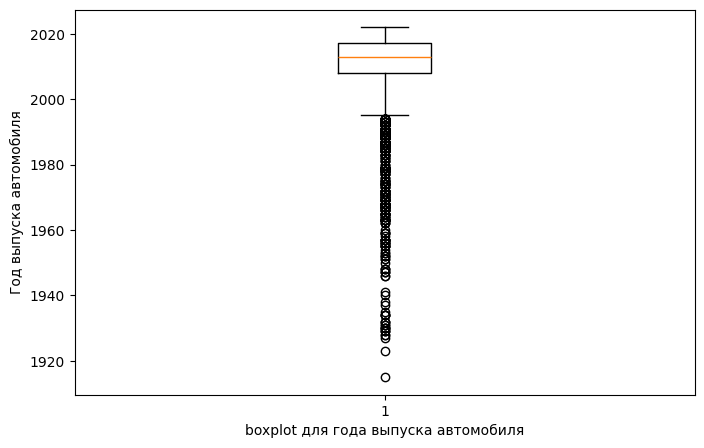

In [22]:
plt.figure(figsize=(8, 5))
plt.boxplot(df.year)
plt.ylabel('Год выпуска автомобиля')
plt.xlabel('boxplot для года выпуска автомобиля')

Границы для нормальных значений года выпуска

In [56]:
def calculate_quantile(data):
   q25 = data.year.quantile(0.25)
   q75 = data.year.quantile(0.75)

   return (q25, q75)

calculate_quantile(df)

(2008.0, 2017.0)

Количество выбросов в годе выпуска автомобиля

In [57]:
def calculate_outliers(data):
   q25 = data.year.quantile(0.25)
   q75 = data.year.quantile(0.75)
   iqr = q75 - q25

   return (q25 - 1.5 * iqr, q75 + 1.5 * iqr)

boundaries = calculate_outliers(df)
is_outlier = ((df.year < boundaries[0]) | (df.year > boundaries[1]))

is_outlier.sum()

394

Записи, в которых год выпуска попадает в выбросы

In [58]:
df[is_outlier]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
13,7317089086,https://seattle.craigslist.org/see/ctd/d/portl...,seattle-tacoma,https://seattle.craigslist.org,14995,1994,ford,e-series van universal by glaval designer luxu...,gas,156925,clean,automatic,https://images.craigslist.org/00r0r_13JUlXZOMl...,"Priced to Sell: $14,9951994 Ford E-Series Van ...",wa,45.391373,-122.613533,2021-05-04 20:22:11-07:00,medium,2021-05-05 03:22:11+00:00
21,7312327909,https://madison.craigslist.org/cto/d/madison-1...,madison,https://madison.craigslist.org,89995,1970,other,oldsmobile 442,gas,111111,clean,automatic,https://images.craigslist.org/00S0S_agk7Nol4CO...,1970 Oldsmobile 442 Convertible 442 Indy Pace ...,wi,43.098400,-89.273400,2021-04-25 10:10:43-05:00,high,2021-04-25 15:10:43+00:00
57,7314413105,https://inlandempire.craigslist.org/ctd/d/cost...,inland empire,https://inlandempire.craigslist.org,69888,1948,ford,coe,gas,1,clean,automatic,https://images.craigslist.org/00M0M_8jgBCZZuG6...,Awesome Resto-Mod COE Ford Car Hauler. Equippe...,ca,33.680100,-117.908500,2021-04-29 10:49:29-07:00,high,2021-04-29 17:49:29+00:00
66,7310077530,https://hudsonvalley.craigslist.org/cto/d/bloo...,hudson valley,https://hudsonvalley.craigslist.org,5500,1990,other,Diahatsu,gas,30000,clean,manual,https://images.craigslist.org/00T0T_a4VRbx40ea...,1991 Daihatsu hijet 5 speed extended cab....im...,ny,41.564400,-74.430400,2021-04-20 18:30:18-04:00,low,2021-04-20 22:30:18+00:00
106,7314527175,https://rapidcity.craigslist.org/ctd/d/sherman...,rapid city / west SD,https://rapidcity.craigslist.org,43500,1968,chevrolet,camaro,gas,43320,clean,manual,https://images.craigslist.org/00h0h_2N66LMJBAI...,1968 Chevrolet Camaro Convertible. VIN:124678N...,sd,33.637200,-96.618400,2021-04-29 15:11:01-06:00,high,2021-04-29 21:11:01+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9886,7313487583,https://springfield.craigslist.org/cto/d/mount...,springfield,https://springfield.craigslist.org,3500,1974,jeep,cj5,gas,10000,clean,manual,https://images.craigslist.org/00G0G_cdxzaTaVqa...,1974 Jeep cj5 304 v8 4speed manual trans Da...,mo,36.331200,-92.375300,2021-04-27 14:30:28-05:00,low,2021-04-27 19:30:28+00:00
9921,7311566144,https://chico.craigslist.org/cto/d/chico-1994-...,chico,https://chico.craigslist.org,16000,1994,ford,f250,gas,32500,clean,automatic,https://images.craigslist.org/01010_343KkgTaHo...,"Up for sale is this 32,000 original mile Ford ...",ca,39.745800,-121.844400,2021-04-23 13:51:20-07:00,medium,2021-04-23 20:51:20+00:00
9944,7313676859,https://reno.craigslist.org/ctd/d/sherman-1984...,reno / tahoe,https://reno.craigslist.org,26500,1984,chevrolet,silverado,gas,38751,clean,automatic,https://images.craigslist.org/00r0r_czXfi4UeJF...,"1984 Chevrolet C10 Silverado, short wheelbase ...",ca,33.637200,-96.618400,2021-04-27 19:44:27-07:00,high,2021-04-28 02:44:27+00:00
9972,7316458200,https://portland.craigslist.org/mlt/cto/d/port...,portland,https://portland.craigslist.org,18500,1972,chevrolet,NaN,gas,75000,clean,automatic,https://images.craigslist.org/00x0x_7FqS8iHJst...,1972 classic Chevrolet pick up custom deluxe ...,or,45.494960,-122.666988,2021-05-03 14:58:34-07:00,medium,2021-05-03 21:58:34+00:00


Заполняю выбросы нижней границей

In [59]:
df.loc[is_outlier, 'year'] = int(boundaries[0])

In [60]:
df.year.describe()

count         9998.0
mean     2011.695139
std         6.520938
min           1994.0
25%           2008.0
50%           2013.0
75%           2017.0
max           2022.0
Name: year, dtype: Float64

Смотрим пропуски в типе топлива

In [61]:
df['fuel'].value_counts(dropna=False)

fuel
gas         8402
other        730
diesel       653
hybrid       108
NaN           61
electric      44
Name: count, dtype: int64

Заполняю пропуски самым часто встречающимся значением

In [62]:
df.fuel = df.fuel.fillna(df['fuel'].mode().item())
print("Количество пропущенных значений в fuel:", df['fuel'].isna().sum())

Количество пропущенных значений в fuel: 0


Смотрим пропуски в типе трансмиссии

In [63]:
df['transmission'].value_counts(dropna=False)

transmission
automatic    7700
other        1624
manual        631
NaN            43
Name: count, dtype: int64

Заполняем пропуски самым часто встречающимся значением

In [64]:
df.transmission = df.transmission.fillna(df['transmission'].mode().item())
print("Количество пропущенных значений в transmission:", df['transmission'].isna().sum())

Количество пропущенных значений в transmission: 0


Поиск и заполнение пропущенных значений в title_status.

In [65]:
df['title_status'].value_counts(dropna=False)

title_status
clean         9518
rebuilt        171
NaN            164
salvage         92
lien            35
missing         16
parts only       2
Name: count, dtype: int64

Заполняю пропущенные значения модой

In [66]:
df.title_status = df.title_status.fillna(df['title_status'].mode().item())
print("Количество пропущенных значений в title_status:", df['title_status'].isna().sum())

Количество пропущенных значений в title_status: 0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9953
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9998 non-null   int64  
 1   url             9998 non-null   object 
 2   region          9998 non-null   object 
 3   region_url      9998 non-null   object 
 4   price           9998 non-null   int64  
 5   year            9998 non-null   Int64  
 6   manufacturer    9998 non-null   object 
 7   model           9872 non-null   object 
 8   fuel            9998 non-null   object 
 9   odometer        9998 non-null   int64  
 10  title_status    9998 non-null   object 
 11  transmission    9998 non-null   object 
 12  image_url       9998 non-null   object 
 13  description     9998 non-null   object 
 14  state           9998 non-null   object 
 15  lat             9902 non-null   float64
 16  long            9902 non-null   float64
 17  posting_date    9998 non-null   object

Строки с пустыми значениями lat, long просто удалил. Информацию по ним не найти, да и заполнять их чем-то странно будет

In [68]:
df.dropna(axis=0, subset=['lat', 'long'], inplace=True)

Поиск и заполнение пропущенных значений в model

In [69]:
df['model'].value_counts(dropna=False)

model
f-150                     148
NaN                       126
silverado 1500            106
1500                      100
camry                      76
                         ... 
q50 2.0t luxe sedan 4d      1
forester xt                 1
range evoque hse            1
altima sl                   1
CX-5                        1
Name: count, Length: 3458, dtype: int64

In [70]:
unique_models = df['model'].unique()
unique_models

array(['2500 crew cab big horn', 'explorer 4wd 4dr xlt',
       'golf r hatchback', ..., 'u Impreza', 'ierra 2500HD', 'CX-5'],
      dtype=object)

Первые пять строк с пропущенными значениями в model

In [71]:
df[df['model'].isna()].head()


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
67,7316913641,https://ventura.craigslist.org/cto/d/camarillo...,ventura county,https://ventura.craigslist.org,3000,2005,rover,NaN,gas,165206,clean,automatic,https://images.craigslist.org/00S0S_b3yx6L4N2S...,2005 Range Rover HSE Changed Oil and now engi...,ca,34.219565,-119.001986,2021-05-04 13:11:15-07:00,low,2021-05-04 20:11:15+00:00
142,7316550853,https://chicago.craigslist.org/chc/cto/d/midlo...,chicago,https://chicago.craigslist.org,3000,2006,jeep,NaN,gas,132000,clean,automatic,https://images.craigslist.org/01111_kNv3EKjH4H...,SUPER CLEAN 2006 JEEP LIBEERY RANAGADE 4X4 O...,il,41.618957,-87.726334,2021-05-03 20:33:40-05:00,low,2021-05-04 01:33:40+00:00
151,7303575863,https://worcester.craigslist.org/ctd/d/fitchbu...,worcester / central MA,https://worcester.craigslist.org,7800,2007,gmc,NaN,gas,190000,clean,automatic,https://images.craigslist.org/00f0f_iWjiToqea2...,2007 gmc with plow leather loaded nice truck r...,ma,42.579600,-71.803100,2021-04-08 09:10:07-04:00,low,2021-04-08 13:10:07+00:00
200,7315267860,https://gainesville.craigslist.org/ctd/d/kissi...,gainesville,https://gainesville.craigslist.org,19200,2012,ram,NaN,gas,121371,clean,automatic,https://images.craigslist.org/00W0W_hHV4D0Po0G...,2012 RAM 1500 Laramie Crew Cab 2WD Offered...,fl,28.329026,-81.404237,2021-05-01 10:05:17-04:00,medium,2021-05-01 14:05:17+00:00
251,7316024407,https://reading.craigslist.org/ctd/d/paterson-...,reading,https://reading.craigslist.org,18695,2007,ram,NaN,diesel,220019,clean,automatic,https://images.craigslist.org/00n0n_jgq4eOvH7I...,2007 Dodge Ram 2500 SLT 4x4 Quad Cab Cummins D...,pa,40.894535,-74.152367,2021-05-02 21:06:09-04:00,medium,2021-05-03 01:06:09+00:00


Информация о модели автомобиля содержится в описании

Решил, что возьму уникальные значению всех моделей и пройдусь по каждому описанию. И если будет совпадение, то этим значением и заполню пропуск, а если нет, то осталю NaN

In [72]:
def get_models(descrip):
    model_list = []
    for desc in df_model.description:
        for model in unique_models:
            try:
                if re.search(fr'\b{model}\b', desc.lower()):
                    model_list.append(model)
                    break
            except:
                pass
        else:
            model_list.append(np.nan)
    
    return model_list


df_model = df[df['model'].isna()]
df_model['model'] = get_models(df_model.description)

/tmp/ipykernel_3363/3155105530.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['model'] = get_models(df_model.description)


In [73]:
df.dropna(subset=['model'], axis=0, inplace=True)

df = pd.concat(
    [df, df_model]
)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9902 entries, 0 to 9972
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9902 non-null   int64  
 1   url             9902 non-null   object 
 2   region          9902 non-null   object 
 3   region_url      9902 non-null   object 
 4   price           9902 non-null   int64  
 5   year            9902 non-null   Int64  
 6   manufacturer    9902 non-null   object 
 7   model           9902 non-null   object 
 8   fuel            9902 non-null   object 
 9   odometer        9902 non-null   int64  
 10  title_status    9902 non-null   object 
 11  transmission    9902 non-null   object 
 12  image_url       9902 non-null   object 
 13  description     9902 non-null   object 
 14  state           9902 non-null   object 
 15  lat             9902 non-null   float64
 16  long            9902 non-null   float64
 17  posting_date    9902 non-null   object

Boxplot для количества пройденных миль

Text(0.5, 0, 'boxplot для кол-ва пройденных миль')

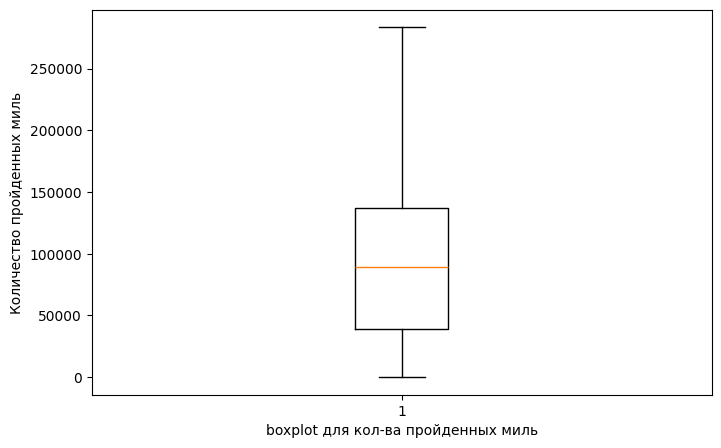

In [23]:
plt.figure(figsize=(8, 5))
plt.boxplot(df.odometer)
plt.ylabel('Количество пройденных миль')
plt.xlabel('boxplot для кол-ва пройденных миль')

## Feature engineering

Смотрим количество уникальных значений модели

In [75]:
len(df.model.unique())

3457

Уменьшаем количество уникальных значений (просте оставляю первое слово из название модели)

In [76]:
df["short_model"] = df.model.apply(lambda x: x.split(" ")[0])
print(f"Количество уникальных значений: {len(df.short_model.unique())}")

Количество уникальных значений: 985


Добавил age_category

In [77]:
df['age_category'] =  df.apply(lambda x: "new" if x.year > 2013 else ("old" if x.year < 2006 else "average"), axis=1)
df['age_category']

0           new
1           new
2           new
3       average
4           new
         ...   
9564    average
9616    average
9670        old
9926        new
9972        old
Name: age_category, Length: 9902, dtype: object

### Преобразование категориальных переменных

In [78]:
variables = [
    "short_model",
    "transmission",
    "region",
    "manufacturer",
    "state",
    "title_status",
    "age_category"
]

for variable in variables:
    print(
        f"Количество уникальных значений {df[variable].name}: {len(df[variable].unique())}"
    )

Количество уникальных значений short_model: 985
Количество уникальных значений transmission: 3
Количество уникальных значений region: 393
Количество уникальных значений manufacturer: 40
Количество уникальных значений state: 51
Количество уникальных значений title_status: 6
Количество уникальных значений age_category: 3


Создаю дадафрейм только с необходимыми переменными

In [83]:
data = df[variables]
data

,short_model,transmission,region,manufacturer,state,title_status,age_category
0,2500,other,chattanooga,ram,tn,clean,new
1,explorer,automatic,north jersey,ford,nj,clean,new
2,golf,other,reno / tahoe,volkswagen,ca,clean,new
3,rav4,automatic,fayetteville,toyota,nc,clean,average
4,altima,automatic,new york city,nissan,ny,clean,new
...,...,...,...,...,...,...,...
9564,prius,automatic,des moines,toyota,ia,clean,average
9616,tahoe,automatic,vermont,ram,vt,clean,average
9670,savana,automatic,louisville,gmc,ky,clean,old
9926,hse,automatic,tulsa,rover,ok,clean,new


Преобразую катгориальные переменные с помощью OnrHotEncoder

In [84]:
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(data[variables])
ohe_data = ohe.transform(data)
print(ohe_data.shape)
ohe_data

(9902, 1481)


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Дополняю датафрейм перобразованными переменными

In [85]:
df[ohe.get_feature_names_out()] = ohe_data
df.head(5)

/tmp/ipykernel_3363/3830920143.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = ohe_data
/tmp/ipykernel_3363/3830920143.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = ohe_data
/tmp/ipykernel_3363/3830920143.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,state_wy,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,age_category_average,age_category_new,age_category_old
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,gas,60023,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Создаю новую переменную с месяцем из даты подачи объявления

In [87]:
df.posting_date

0       2021-04-17 12:30:50-04:00
1       2021-05-03 15:40:21-04:00
2       2021-04-28 03:52:20-07:00
3       2021-04-17 10:08:57-04:00
4       2021-05-03 18:32:06-04:00
                  ...            
9564    2021-04-29 10:50:54-05:00
9616    2021-04-09 16:24:23-04:00
9670    2021-04-20 04:48:30-04:00
9926    2021-05-03 16:37:36-05:00
9972    2021-05-03 14:58:34-07:00
Name: posting_date, Length: 9902, dtype: object

In [81]:
df['month'] = df.date.apply(lambda x: int(x.split(' ')[0].split('-')[1]))
df.month

0       4
1       5
2       4
3       4
4       5
       ..
9564    4
9616    4
9670    4
9926    5
9972    5
Name: month, Length: 9902, dtype: int64

Создаю переменную с возрастом автомобиля

In [82]:
df['diff_years'] = df.date.apply(lambda x: int(x.split(' ')[0].split('-')[0])) - df.year
df.diff_years

0        1
1        5
2        4
3        8
4        0
        ..
9564    14
9616     9
9670    16
9926     4
9972    27
Name: diff_years, Length: 9902, dtype: Int64

Преобразую количественные переменные

In [90]:
columns_list = [
    "lat",
    "long",
    "year",
    "diff_years",
    "month"
]
columns_std = [col + '_std' for col in columns_list]

data_num = df[columns_list]
data_num

,lat,long,year,diff_years,month
0,35.060000,-85.250000,2020,1,4
1,40.821805,-74.061962,2016,5,5
2,33.779214,-84.411811,2017,4,4
3,35.715954,-78.655304,2013,8,4
4,40.654800,-73.609700,2021,0,5
...,...,...,...,...,...
9564,41.629500,-93.723000,2007,14,4
9616,42.788204,-71.233728,2012,9,4
9670,37.858900,-86.006900,2005,16,4
9926,36.126200,-95.940800,2017,4,5


Для преобразования количественных переменных использую StandartScaler

In [91]:
std_scaler = StandardScaler()
std_scaler.fit(data_num)
std_scaler_new = std_scaler.transform(data_num)
std_scaler_new


array([[-0.604685  ,  0.49184024,  1.27253982, -1.27253982, -0.61447029],
       [ 0.38114891,  1.10902316,  0.66041758, -0.66041758,  1.62741799],
       [-0.82382506,  0.53807855,  0.81344814, -0.81344814, -0.61447029],
       ...,
       [-0.12579852,  0.4500862 , -1.02291858,  1.02291858, -0.61447029],
       [-0.4222602 , -0.09791278,  0.81344814, -0.81344814,  1.62741799],
       [ 1.18071687, -1.57225053, -2.70625474,  2.70625474,  1.62741799]])

Добавляю новые фичи в исходный датасет

In [92]:
df[columns_std] = std_scaler_new
print(df.columns.to_list())
df.head(5)

['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status', 'transmission', 'image_url', 'description', 'state', 'lat', 'long', 'posting_date', 'price_category', 'date', 'short_model', 'age_category', 'month', 'diff_years', 'short_model_-benz', 'short_model_1', 'short_model_124', 'short_model_128i', 'short_model_135i', 'short_model_1500', 'short_model_163869', 'short_model_1928', 'short_model_1951', 'short_model_1954', 'short_model_1960s', 'short_model_1966', 'short_model_1968', 'short_model_1972', 'short_model_1977', 'short_model_1978', 'short_model_198.5', 'short_model_1988', 'short_model_1994', 'short_model_1999', 'short_model_2', 'short_model_200', 'short_model_2000', 'short_model_2002', 'short_model_2006', 'short_model_2007', 'short_model_2008', 'short_model_2009', 'short_model_2012', 'short_model_2015', 'short_model_2016', 'short_model_2017', 'short_model_2018', 'short_model_2021', 'short_model_210', 'short_model_240', 'shor

/tmp/ipykernel_3363/749244879.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[columns_std] = std_scaler_new
/tmp/ipykernel_3363/749244879.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[columns_std] = std_scaler_new
/tmp/ipykernel_3363/749244879.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,title_status_rebuilt,title_status_salvage,age_category_average,age_category_new,age_category_old,lat_std,long_std,year_std,diff_years_std,month_std
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,0.0,0.0,0.0,1.0,0.0,-0.604685,0.491840,1.272540,-1.272540,-0.614470
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,gas,60023,...,0.0,0.0,0.0,1.0,0.0,0.381149,1.109023,0.660418,-0.660418,1.627418
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0.0,0.0,0.0,1.0,0.0,-0.823825,0.538079,0.813448,-0.813448,-0.614470
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0.0,0.0,1.0,0.0,0.0,-0.492453,0.855634,0.201326,-0.201326,-0.614470
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,...,0.0,0.0,0.0,1.0,0.0,0.352575,1.133972,1.425570,-1.425570,1.627418


Удаляю лишние колонки (переменные без преобразования)

In [93]:
columns_for_drop = [
    "year",
    "url",
    "region",
    "region_url",
    "manufacturer",
    "model",
    "fuel",
    "odometer",
    "title_status",
    "transmission",
    "image_url",
    "description",
    "state",
    "lat",
    "long",
    "posting_date",
    "age_category",
    "short_model",
    "date",
    "month",
    "diff_years",
]

df_prepared = df.drop(columns=columns_for_drop)

In [94]:
print(df_prepared.shape)
df_prepared.columns.to_list()

(9902, 1489)


['id',
 'price',
 'price_category',
 'short_model_-benz',
 'short_model_1',
 'short_model_124',
 'short_model_128i',
 'short_model_135i',
 'short_model_1500',
 'short_model_163869',
 'short_model_1928',
 'short_model_1951',
 'short_model_1954',
 'short_model_1960s',
 'short_model_1966',
 'short_model_1968',
 'short_model_1972',
 'short_model_1977',
 'short_model_1978',
 'short_model_198.5',
 'short_model_1988',
 'short_model_1994',
 'short_model_1999',
 'short_model_2',
 'short_model_200',
 'short_model_2000',
 'short_model_2002',
 'short_model_2006',
 'short_model_2007',
 'short_model_2008',
 'short_model_2009',
 'short_model_2012',
 'short_model_2015',
 'short_model_2016',
 'short_model_2017',
 'short_model_2018',
 'short_model_2021',
 'short_model_210',
 'short_model_240',
 'short_model_2500',
 'short_model_2500hd',
 'short_model_280zx',
 'short_model_3',
 'short_model_3-series',
 'short_model_3-window',
 'short_model_3.2',
 'short_model_300',
 'short_model_300-series',
 'short_mode

Сохраняю финальный датасет в новый файл

In [95]:
df_prepared.to_csv('data/final_prepared.csv', index=False)

# Modelling

### 1. RandomForest

Формирую датасет для обучения и делю его на train и test

In [25]:
df_prep = pd.read_csv('data/final_prepared.csv')

In [3]:
df_forest = df_prep.copy()
df_forest = df_forest.drop(['id', 'price'], axis=1)

x = df_forest.drop(['price_category'], axis=1)
y = df_forest['price_category']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

Обучаю модель RandomForest

In [10]:
rf_clf = RandomForestClassifier(
    n_estimators=150, 
    min_samples_split=3, 
    bootstrap=False, 
    random_state=42, 
    max_depth=80,
)

rf_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=80, min_samples_split=3,
                       n_estimators=150, random_state=42)

In [11]:
predicted_train_rf = rf_clf.predict(x_train)
predicted_test_rf = rf_clf.predict(x_test)

print(accuracy_score(y_train, predicted_train_rf))
print(accuracy_score(y_test, predicted_test_rf))

0.9998557206752272
0.7606866374957927


Кросс-валидация

In [14]:
cross_validate(rf_clf, x, y, cv=5)

{'fit_time': array([22.34123874, 16.47774315, 22.28009725, 29.12905025, 19.34848547]),
 'score_time': array([0.23775029, 0.23669314, 0.41251254, 0.32247591, 0.30634737]),
 'test_score': array([0.76527007, 0.78344271, 0.76313131, 0.77424242, 0.75656566])}

In [16]:
cv_score = cross_val_score(rf_clf, x, y, cv=5)

In [17]:
print(cv_score.mean())
print(cv_score.std())

0.7685304330534013
0.0093588363279649


### 2. LogisticRegression

Формирую датасет для обучения и делю его на train и test

In [10]:
logreg_df = df_prep.copy()
x = logreg_df.drop(['price_category', 'price', 'id'], axis=1)
y = logreg_df['price_category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Обучаю модель логистической регрессии

In [28]:
lr = LogisticRegression(
    C=3,
    max_iter=400,
    random_state=42,
    )
lr.fit(x_train, y_train)

LogisticRegression(C=3, max_iter=1000, random_state=42, solver='sag')

In [29]:
logreg_pred_train = lr.predict(x_train)
print('accuracy train', accuracy_score(y_train, logreg_pred_train))

logreg_pred_test = lr.predict(x_test)
print('accuracy test' ,accuracy_score(y_test, logreg_pred_test))
print('confusion_matrix', confusion_matrix(y_test, logreg_pred_test))

accuracy train 0.841869860049055
accuracy test 0.7421743520700101
confusion_matrix [[853  38 150]
 [ 29 758 172]
 [157 220 594]]


In [30]:
cv_score = cross_val_score(lr, x, y, cv=5)
print(cv_score.mean())
print(cv_score.std())

/home/igor/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/igor/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/igor/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.7427783131670057
0.009349132342329737


/home/igor/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### 3. Многослойный персептрон

Формирую датасет для обучения и делю его на train и test

In [26]:
mlp_df = df_prep.copy()
x = mlp_df.drop(['price_category', 'price', 'id'], axis=1)
y = mlp_df['price_category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [27]:
mlp = MLPClassifier(
    random_state=42, 
    max_iter=500, 
    hidden_layer_sizes=(100,40),
    )
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 40), max_iter=500, random_state=42)

In [28]:
mlp_pred_train = mlp.predict(x_train)
print('accuracy train' ,accuracy_score(y_train, mlp_pred_train))

mlp_pred_test = mlp.predict(x_test)
print('accuracy test' ,accuracy_score(y_test, mlp_pred_test))

accuracy train 0.9971144135045448
accuracy test 0.7458768091551666


In [30]:
cv_score = cross_val_score(mlp, x, y, cv=5)
print(cv_score.mean())
print(cv_score.std())

0.7411609787934876
0.012725531046048847


# Results

В моем случае лучше всего показала себя модель random forest.
По результатам кросс-вализации:
1. accuracy = 0.76
2. std = 0.009

Обучение модели на всем датасете

In [30]:
df_forest = df_prep.copy()
df_forest = df_forest.drop(['id', 'price'], axis=1)

x = df_forest.drop(['price_category'], axis=1)
y = df_forest['price_category']

In [31]:
rf_clf = RandomForestClassifier(
    n_estimators=150, 
    min_samples_split=3, 
    bootstrap=False, 
    random_state=42, 
    max_depth=80,
)

rf_clf.fit(x, y)

RandomForestClassifier(bootstrap=False, max_depth=80, min_samples_split=3,
                       n_estimators=150, random_state=42)

Сохраняю полученню модель

In [32]:
with open('model.pickle', 'wb') as file:
    pickle.dump(rf_clf, file)